# Datasets
https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/versions/7?resource=download

In [2]:
import featuretools as ft
import numpy as np
import pandas as pd

# Read data

In [26]:
customers = pd.read_csv('Datasets/olist_customers_dataset.csv')
orders = pd.read_csv('Datasets/olist_orders_dataset.csv')
orderDetails = pd.read_csv('Datasets/olist_order_items_dataset.csv')
products = pd.read_csv('Datasets/olist_products_dataset.csv')
sellers = pd.read_csv('Datasets/olist_sellers_dataset.csv')
reviews = pd.read_csv('Datasets/olist_order_reviews_dataset.csv')

In [27]:
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP


In [28]:
unique_values = customers['customer_state'].nunique()

unique_values

27

In [29]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [30]:
orderDetails.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [31]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [32]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [33]:
reviews.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,18/1/2018 00:00,18/1/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,10/3/2018 00:00,11/3/2018 03:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,17/2/2018 00:00,18/2/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,21/4/2017 00:00,21/4/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,1/3/2018 00:00,2/3/2018 10:26


# Data Cleaning & Preprocessing

### Drop duplicates

In [34]:
# Check for duplicated values in the primary key column
print(customers['customer_id'].duplicated().any())
print(products['product_id'].duplicated().any())
print(orders['order_id'].duplicated().any())
print(sellers['seller_id'].duplicated().any())
print(reviews['review_id'].duplicated().any())

False
False
False
False
True


In [35]:
# Drop duplicates in primary key column
reviews = reviews.drop_duplicates(subset = ['review_id'])

print(reviews['review_id'].duplicated().any())

False


### Merge orderDetails dataframe into orders dataframe & add review_id into the orders dataframe

In [36]:
# Drop order_item_id
orderDetails.drop('order_item_id', axis=1, inplace=True)

# combine dataframe of orders and orderItems
orders = pd.merge(orders, orderDetails, on='order_id', how='inner')

# Add foreign key (review_id) into orders df
orders = pd.merge(orders, reviews[['order_id', 'review_id']], on='order_id', how='inner')

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,price,freight_value,review_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,359d03e676b3c069f62cadba8dd3f6e8
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,e50934924e227544ba8246aeb3770dd4


In [37]:
# Drop order_id in reviews df
reviews.drop('order_id', axis=1, inplace=True)

reviews.head()

,review_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,4,18/1/2018 00:00,18/1/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,5,10/3/2018 00:00,11/3/2018 03:05
2,228ce5500dc1d8e020d8d1322874b6f0,5,17/2/2018 00:00,18/2/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,5,21/4/2017 00:00,21/4/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,5,1/3/2018 00:00,2/3/2018 10:26


#### Check for duplicates

In [38]:
print(orders['order_id'].duplicated().any())

True


In [39]:
# Drop duplicates in primary key column
orders = orders.drop_duplicates(subset = ['order_id'])

print(orders['order_id'].duplicated().any())

False


### Drop rows with missing values

In [40]:
# Check for any missing values
df_list = {
    'Customers': customers,
    'Orders': orders,
    'Products': products,
    'Sellers': sellers,
    'Reviews': reviews
}
null = []

for name, df in df_list.items():
    # Count missing values in each column
    null.append(df.isna().sum())
    
# Print null content
for name, null_values in zip(df_list.keys(), null):
    print(f"Null values in {name} DataFrame:")
    print(null_values)
    print("\n")

Null values in Customers DataFrame:
customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


Null values in Orders DataFrame:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1004
order_delivered_customer_date    2175
order_estimated_delivery_date       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
review_id                           0
dtype: int64


Null values in Products DataFrame:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_le

In [41]:
# Drop rows containing missing values
orders = orders.dropna()
products = products.dropna()

In [42]:
# Ensure all missing values are dropped
df_list = {
    'Customers': customers,
    'Orders': orders,
    'Products': products,
    'Sellers': sellers,
    'Reviews': reviews
}
null = []

for name, df in df_list.items():
    # Count missing values in each column
    null.append(df.isna().sum())
    
# Print null content
for name, null_values in zip(df_list.keys(), null):
    print(f"Null values in {name} DataFrame:")
    print(null_values)
    print("\n")

Null values in Customers DataFrame:
customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


Null values in Orders DataFrame:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_id                        0
dtype: int64


Null values in Products DataFrame:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0


In [43]:
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP


In [44]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [45]:
reviews.head()

,review_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,4,18/1/2018 00:00,18/1/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,5,10/3/2018 00:00,11/3/2018 03:05
2,228ce5500dc1d8e020d8d1322874b6f0,5,17/2/2018 00:00,18/2/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,5,21/4/2017 00:00,21/4/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,5,1/3/2018 00:00,2/3/2018 10:26


In [46]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [47]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,price,freight_value,review_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,359d03e676b3c069f62cadba8dd3f6e8
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,e50934924e227544ba8246aeb3770dd4


# Define Entities and EntitySet
### Create entity set

In [48]:
# creating and entity set 'es'
es = ft.EntitySet(id = 'ecommerce_data')

### Define entities

In [49]:
# Adding a DataFrame as an entity
es.add_dataframe(dataframe_name='customers_entity', dataframe=customers, index='customer_id')
es.add_dataframe(dataframe_name='products_entity', dataframe=products, index='product_id')
es.add_dataframe(dataframe_name='orders_entity', dataframe=orders, index='order_id')
es.add_dataframe(dataframe_name='sellers_entity', dataframe=sellers, index='seller_id')
es.add_dataframe(dataframe_name='reviews_entity', dataframe=reviews, index='review_id')

C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\type_sys\inference_functions.py:27: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pdtypes.is_categorical_dtype(series.dtype):
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\type_sys\utils.py:40: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  pd.to_datetime(
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\type_sys\utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwo

C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\type_sys\utils.py:40: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  pd.to_datetime(
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\type_sys\utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\type_sys\utils.py:40: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\type_sys\inference_functions.py:189: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  pdtypes.is_categorical_dtype(series.dtype)
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\type_sys\inference_functions.py:27: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pdtypes.is_categorical_dtype(series.dtype):
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\type_sys\utils.py:40: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  pd.to_datetime(
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\

C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\type_sys\utils.py:40: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  pd.to_datetime(
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\type_sys\utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\type_sys\utils.py:40: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\type_sys\inference_functions.py:27: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pdtypes.is_categorical_dtype(series.dtype):
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\type_sys\inference_functions.py:189: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  pdtypes.is_categorical_dtype(series.dtype)
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\type_sys\inference_functions.py:27: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pdtypes.is_categorical_dtype(series.dtype):
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\type_sys\utils.py:40: UserWarning: The argument 'infer_datetime_format' is depr

Entityset: ecommerce_data
  DataFrames:
    customers_entity [Rows: 99441, Columns: 4]
    products_entity [Rows: 32340, Columns: 9]
    orders_entity [Rows: 95992, Columns: 14]
    sellers_entity [Rows: 3095, Columns: 4]
    reviews_entity [Rows: 99173, Columns: 4]
  Relationships:
    No relationships

# Establish relationships between entities

In [50]:
es.add_relationship(parent_dataframe_name='customers_entity', parent_column_name='customer_id', 
                    child_dataframe_name='orders_entity', child_column_name='customer_id')
es.add_relationship(parent_dataframe_name='products_entity', parent_column_name='product_id', 
                    child_dataframe_name='orders_entity', child_column_name='product_id')
es.add_relationship(parent_dataframe_name='sellers_entity', parent_column_name='seller_id', 
                    child_dataframe_name='orders_entity', child_column_name='seller_id')
es.add_relationship(parent_dataframe_name='reviews_entity', parent_column_name='review_id', 
                    child_dataframe_name='orders_entity', child_column_name='review_id')

C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\featuretools\entityset\entityset.py:414: UserWarning: Logical type Categorical for child column seller_id does not match parent column seller_id logical type Unknown. Changing child logical type to match parent.
  warnings.warn(


Entityset: ecommerce_data
  DataFrames:
    customers_entity [Rows: 99441, Columns: 4]
    products_entity [Rows: 32340, Columns: 9]
    orders_entity [Rows: 95992, Columns: 14]
    sellers_entity [Rows: 3095, Columns: 4]
    reviews_entity [Rows: 99173, Columns: 4]
  Relationships:
    orders_entity.customer_id -> customers_entity.customer_id
    orders_entity.product_id -> products_entity.product_id
    orders_entity.seller_id -> sellers_entity.seller_id
    orders_entity.review_id -> reviews_entity.review_id

# Perform Deep Feature Synthesis

In [51]:
# !pip install dask

In [52]:
feature_matrix, feature_names = ft.dfs(entityset=es, 
                                       target_dataframe_name = 'orders_entity')

C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:825: FutureWarning: The provided callable <function sum at 0x0000014F29A50040> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  to_merge = base_frame.groupby(
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:825: FutureWarning: The provided callable <function amax at 0x0000014F29A508B0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  to_merge = base_frame.groupby(
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:825: FutureWarning: The provided callable <function std at 0x0000014F29A54670> is curre

C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:839: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pdtypes.is_categorical_dtype(frame.index):
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\logical_types.py:684: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pdtypes.is_categorical_dtype(typed_ser.dtype):
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\logical_types.py:684: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pdtypes.is_categorical_dtype(typed_ser.dtype):
C:\Users\User\anaconda3\envs\dm-env\lib\site-packages\woodwork\logical_types.py:684: FutureWarning: is_categorical_dtype is deprecated and w

In [53]:
feature_matrix.head()

,order_status,price,freight_value,DAY(order_approved_at),DAY(order_delivered_carrier_date),DAY(order_delivered_customer_date),DAY(order_estimated_delivery_date),DAY(order_purchase_timestamp),DAY(shipping_limit_date),MONTH(order_approved_at),...,reviews_entity.SUM(orders_entity.freight_value),reviews_entity.SUM(orders_entity.price),reviews_entity.DAY(review_answer_timestamp),reviews_entity.DAY(review_creation_date),reviews_entity.MONTH(review_answer_timestamp),reviews_entity.MONTH(review_creation_date),reviews_entity.WEEKDAY(review_answer_timestamp),reviews_entity.WEEKDAY(review_creation_date),reviews_entity.YEAR(review_answer_timestamp),reviews_entity.YEAR(review_creation_date)
order_id,,,,,,,,,,,,,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,delivered,29.99,8.72,2,4,10,18,2,6,10,...,8.72,29.99,12,11,10,10,3,2,2017,2017
53cdb2fc8bc7dce0b6741e2150273451,delivered,118.70,22.76,26,26,7,13,24,30,7,...,22.76,118.70,8,8,8,8,2,2,2018,2018
47770eb9100c2d0c44946d9cf07ec65d,delivered,159.90,19.22,8,8,17,4,8,13,8,...,19.22,159.90,22,18,8,8,2,5,2018,2018
949d5b44dbf5de918fe9c16f97b45f8a,delivered,45.00,27.20,18,22,2,15,18,23,11,...,27.20,45.00,5,3,12,12,1,6,2017,2017
ad21c59c0840e6cb83a9ceb5573f8159,delivered,19.90,8.72,13,14,16,26,13,19,2,...,8.72,19.90,18,17,2,2,6,5,2018,2018


In [54]:
feature_matrix.columns

Index(['order_status', 'price', 'freight_value', 'DAY(order_approved_at)',
       'DAY(order_delivered_carrier_date)',
       'DAY(order_delivered_customer_date)',
       'DAY(order_estimated_delivery_date)', 'DAY(order_purchase_timestamp)',
       'DAY(shipping_limit_date)', 'MONTH(order_approved_at)',
       ...
       'reviews_entity.SUM(orders_entity.freight_value)',
       'reviews_entity.SUM(orders_entity.price)',
       'reviews_entity.DAY(review_answer_timestamp)',
       'reviews_entity.DAY(review_creation_date)',
       'reviews_entity.MONTH(review_answer_timestamp)',
       'reviews_entity.MONTH(review_creation_date)',
       'reviews_entity.WEEKDAY(review_answer_timestamp)',
       'reviews_entity.WEEKDAY(review_creation_date)',
       'reviews_entity.YEAR(review_answer_timestamp)',
       'reviews_entity.YEAR(review_creation_date)'],
      dtype='object', length=110)

In [56]:
for column in feature_matrix.columns:
    print(column)

order_status
price
freight_value
DAY(order_approved_at)
DAY(order_delivered_carrier_date)
DAY(order_delivered_customer_date)
DAY(order_estimated_delivery_date)
DAY(order_purchase_timestamp)
DAY(shipping_limit_date)
MONTH(order_approved_at)
MONTH(order_delivered_carrier_date)
MONTH(order_delivered_customer_date)
MONTH(order_estimated_delivery_date)
MONTH(order_purchase_timestamp)
MONTH(shipping_limit_date)
WEEKDAY(order_approved_at)
WEEKDAY(order_delivered_carrier_date)
WEEKDAY(order_delivered_customer_date)
WEEKDAY(order_estimated_delivery_date)
WEEKDAY(order_purchase_timestamp)
WEEKDAY(shipping_limit_date)
YEAR(order_approved_at)
YEAR(order_delivered_carrier_date)
YEAR(order_delivered_customer_date)
YEAR(order_estimated_delivery_date)
YEAR(order_purchase_timestamp)
YEAR(shipping_limit_date)
customers_entity.customer_zip_code_prefix
customers_entity.customer_city
customers_entity.customer_state
products_entity.product_category_name
products_entity.product_name_lenght
products_entity.pr

### Save feature_matrix as a csv file

In [253]:
feature_matrix.to_csv('feature_matrix.csv', index = False)

## Finding Insights

In [147]:
# !pip install seaborn

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [3]:
df = pd.read_csv('feature_matrix.csv')

df.head()

,order_status,price,freight_value,DAY(order_approved_at),DAY(order_delivered_carrier_date),DAY(order_delivered_customer_date),DAY(order_estimated_delivery_date),DAY(order_purchase_timestamp),DAY(shipping_limit_date),MONTH(order_approved_at),...,reviews_entity.SUM(orders_entity.freight_value),reviews_entity.SUM(orders_entity.price),reviews_entity.DAY(review_answer_timestamp),reviews_entity.DAY(review_creation_date),reviews_entity.MONTH(review_answer_timestamp),reviews_entity.MONTH(review_creation_date),reviews_entity.WEEKDAY(review_answer_timestamp),reviews_entity.WEEKDAY(review_creation_date),reviews_entity.YEAR(review_answer_timestamp),reviews_entity.YEAR(review_creation_date)
0,delivered,29.99,8.72,2,4,10,18,2,6,10,...,8.72,29.99,12,11,10,10,3,2,2017,2017
1,delivered,118.70,22.76,26,26,7,13,24,30,7,...,22.76,118.70,8,8,8,8,2,2,2018,2018
2,delivered,159.90,19.22,8,8,17,4,8,13,8,...,19.22,159.90,22,18,8,8,2,5,2018,2018
3,delivered,45.00,27.20,18,22,2,15,18,23,11,...,27.20,45.00,5,3,12,12,1,6,2017,2017
4,delivered,19.90,8.72,13,14,16,26,13,19,2,...,8.72,19.90,18,17,2,2,6,5,2018,2018


### Insights 1: Top 5 States with the Highest Percentage of Customers

In [6]:
# Count number of customers for each state
customers_state_counts = df['customers_entity.customer_state'].value_counts()

# Get the index of the top 5 states with the most customers
top_5_states = customers_state_counts.head(5).index

# Calculate the total number of customers for states not in the top 5
other_states_counts = customers_state_counts[~customers_state_counts.index.isin(top_5_states)].sum()

# Save the counts for the top 5 states and other states
states_count_dict = customers_state_counts.head(5).to_dict()
states_count_dict['Others'] = other_states_counts

# Convert the dictionary to a Series
states_counts = pd.Series(states_count_dict)

states_counts

SP        40289
RJ        12285
MG        11301
RS         5315
PR         4900
Others    21902
dtype: int64

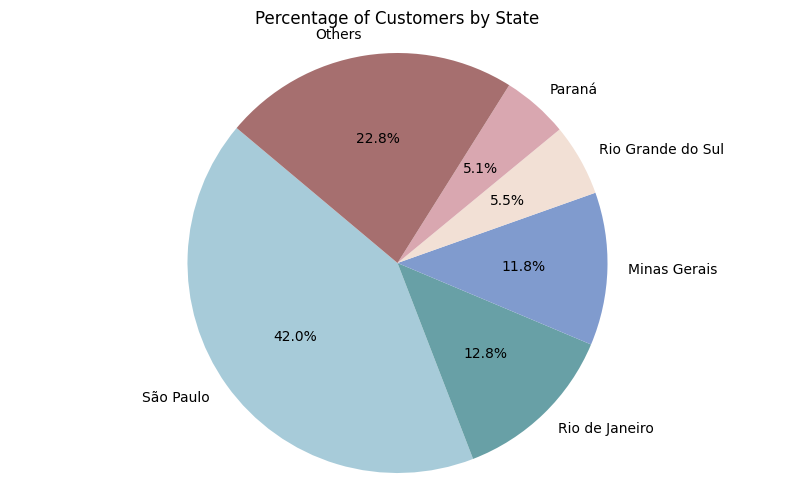

In [7]:
# Plot the graph in a pie chart
plt.figure(figsize=(10, 6))

# Define the colors for the pie chart
# link to color pallete: https://colorkit.co/palette/085578-538085-faf1e2-e3baaa-e47e8c-ffaa6a/
colours = [ '#a7cbd9', '#68a0a6', '#809bce', '#f2e0d5', '#d9a7b0', '#a66f6f']


labels = ['São Paulo', 'Rio de Janeiro', 'Minas Gerais', 'Rio Grande do Sul', 'Paraná', 'Others']
plt.pie(states_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colours)

plt.axis('equal')

plt.title('Percentage of Customers by State')
plt.show()

### Insights 2: Top 5 States with the Highest Percentage of Sellers

In [27]:
# Count number of sellers for each state
seller_state_counts = df['sellers_entity.seller_state'].value_counts()

# Select the top 5 state with the most number of sellers
top_5_states = seller_state_counts.head(5).index

# Calculate the total number of sellers for states not in the top 5
other_states_counts = seller_state_counts[~seller_state_counts.index.isin(top_5_states)].sum()

# Save the counts for the top 5 states and other states
states_count_dict = seller_state_counts.head(5).to_dict()
states_count_dict['Others'] = other_states_counts

# Convert the dictionary to a Series
states_counts = pd.Series(states_count_dict)

states_counts

SP        68058
MG         7605
PR         7382
RJ         4174
SC         3540
Others     5233
dtype: int64

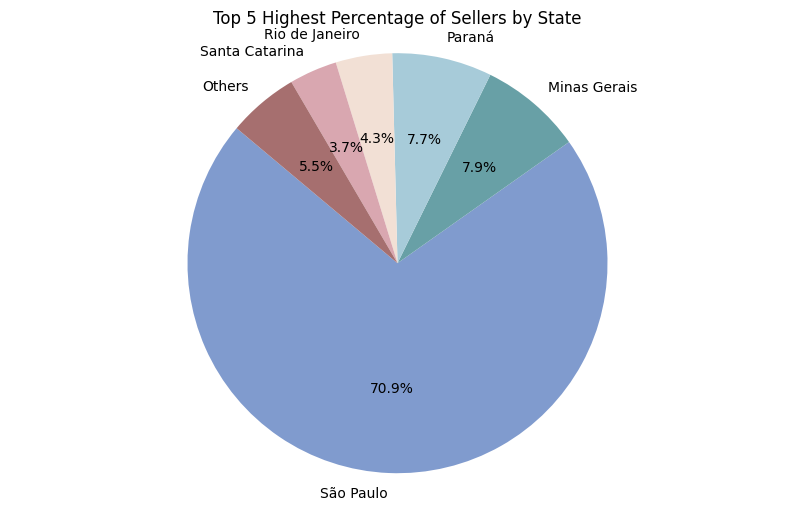

In [48]:
# Plot the graph in a pie chart
plt.figure(figsize=(10, 6))

colours = ['#809bce', '#68a0a6', '#a7cbd9', '#f2e0d5', '#d9a7b0', '#a66f6f']

labels = ['São Paulo', 'Minas Gerais', 'Paraná', 'Rio de Janeiro', 'Santa Catarina', 'Others']
plt.pie(states_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colours )

plt.axis('equal')

plt.title('Top 5 Highest Percentage of Sellers by State')
plt.show()

### Insights 3: Average Customers' Spendings by State per Year

In [12]:
# Group average order price by customer's state
customer_avg_spendings = df.groupby('customers_entity.customer_state')['customers_entity.MEAN(orders_entity.price)'].mean().reset_index()
                           
# Sort data descendingly
customer_avg_spendings = customer_avg_spendings.sort_values(by='customers_entity.MEAN(orders_entity.price)', ascending=False)

customer_avg_spendings

,customers_entity.customer_state,customers_entity.MEAN(orders_entity.price)
14,PB,202.495437
1,AL,188.597190
0,AC,185.304810
20,RO,178.796250
13,PA,173.591203
3,AP,173.074328
26,TO,166.433015
19,RN,165.808284
16,PI,161.887975
5,CE,157.589631


C:\Users\User\AppData\Local\Temp\ipykernel_15916\1172761217.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customers_entity.customer_state', y='customers_entity.MEAN(orders_entity.price)',


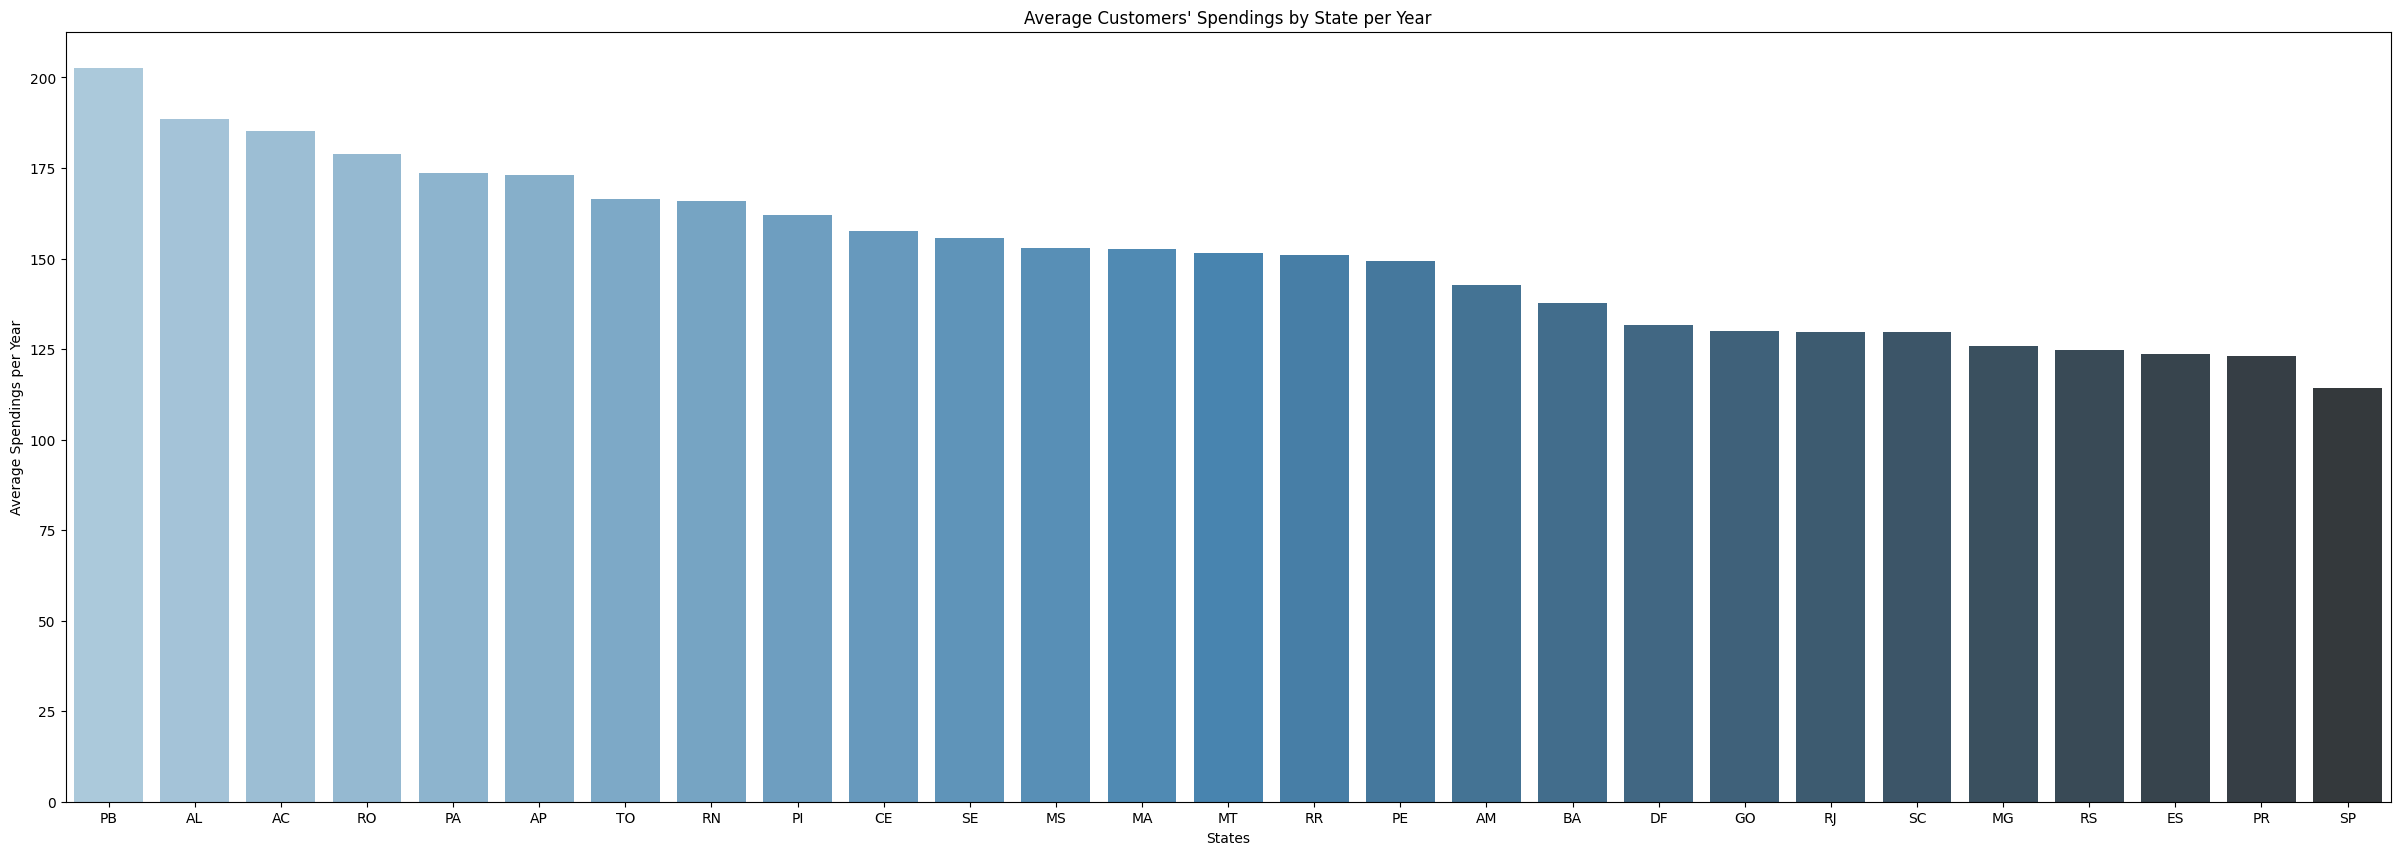

In [16]:
# Plot graph
plt.figure(figsize=(30, 10))

sns.barplot(x='customers_entity.customer_state', y='customers_entity.MEAN(orders_entity.price)', 
            data=customer_avg_spendings, palette='Blues_d')
plt.xlabel('States')
plt.ylabel('Average Spendings per Year')
plt.title('Average Customers\' Spendings by State per Year')
plt.show()

### Insights 4: Top 5 Best-Selling Product Category

In [9]:
# Group by product category and calculate the total sales for each product category
product_sales = df.groupby('products_entity.product_category_name')['products_entity.SUM(orders_entity.price)'].sum().reset_index()

# Sort data descendingly
product_sales = product_sales.sort_values(by='products_entity.SUM(orders_entity.price)', ascending=False)

product_sales

,products_entity.product_category_name,products_entity.SUM(orders_entity.price)
11,beleza_saude,45570774.28
66,relogios_presentes,43862227.02
44,informatica_acessorios,34398343.18
13,cama_mesa_banho,32205284.72
40,ferramentas_jardim,27875226.54
...,...,...
60,pc_gamer,2955.84
35,fashion_esporte,2695.91
46,la_cuisine,2637.99
37,fashion_roupa_infanto_juvenil,939.87


In [10]:
# Reduce the values by dividing by 1 000 000
product_sales['products_entity.SUM(orders_entity.price)_millions'] = product_sales['products_entity.SUM(orders_entity.price)'] / 1000000

# Get the top 5 product category
top_5_product = product_sales.head(5)

top_5_product

,products_entity.product_category_name,products_entity.SUM(orders_entity.price),products_entity.SUM(orders_entity.price)_millions
11,beleza_saude,45570774.28,45.570774
66,relogios_presentes,43862227.02,43.862227
44,informatica_acessorios,34398343.18,34.398343
13,cama_mesa_banho,32205284.72,32.205285
40,ferramentas_jardim,27875226.54,27.875227


C:\Users\User\AppData\Local\Temp\ipykernel_17084\3031263980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='products_entity.product_category_name', y='products_entity.SUM(orders_entity.price)_millions', data=top_5_product, palette='Blues_d')


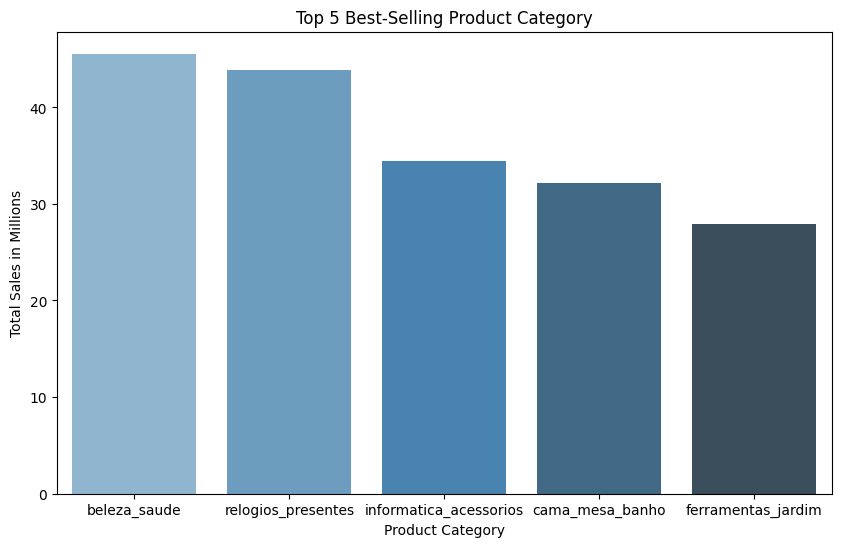

In [11]:
plt.figure(figsize=(10, 6))

sns.barplot(x='products_entity.product_category_name', y='products_entity.SUM(orders_entity.price)_millions', 
            data=top_5_product, palette='Blues_d')
plt.xlabel('Product Category')
plt.ylabel('Total Sales in Millions')
plt.title('Top 5 Best-Selling Product Category')
plt.show()

### Insights 5: Average Freight Cost per Month Per Year

In [265]:
# Group transport fees by month & year & calcualte the average freight cost for each order
freight_cost = df.groupby(['YEAR(order_delivered_carrier_date)', 'MONTH(order_delivered_carrier_date)'])['customers_entity.MEAN(orders_entity.freight_value)'].mean().reset_index()
                           
freight_cost

,YEAR(order_delivered_carrier_date),MONTH(order_delivered_carrier_date),customers_entity.MEAN(orders_entity.freight_value)
0,2016,10,18.951583
1,2016,11,27.539310
2,2016,12,10.205000
3,2017,1,17.840051
4,2017,2,20.105207
5,2017,3,18.986844
6,2017,4,19.222496
7,2017,5,19.563034
8,2017,6,19.719538
9,2017,7,19.315823


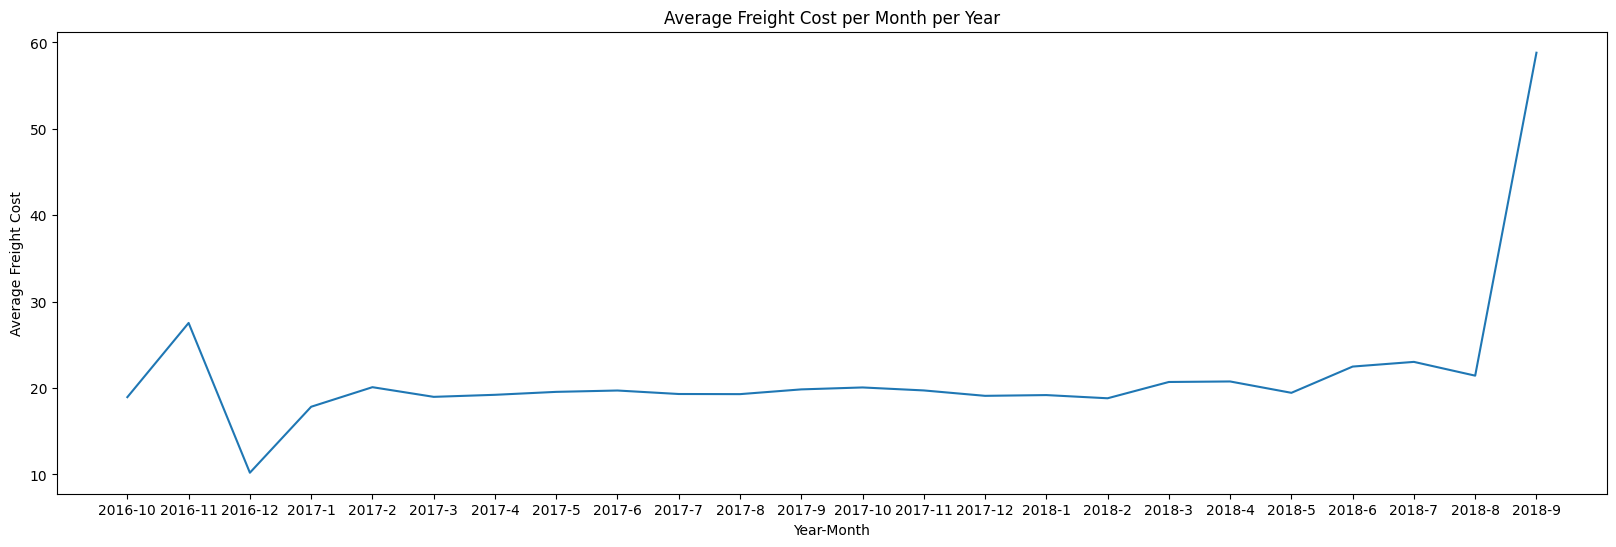

In [266]:
# Create a new column that combines 'year' and 'month' for the x-axis labels
freight_cost['year_month'] = freight_cost['YEAR(order_delivered_carrier_date)'].astype(str) + '-' + freight_cost['MONTH(order_delivered_carrier_date)'].astype(str)

# Create a line plot
plt.figure(figsize=(20, 6))
plt.plot(freight_cost['year_month'], freight_cost['customers_entity.MEAN(orders_entity.freight_value)'])
plt.xlabel('Year-Month')
plt.ylabel('Average Freight Cost')
plt.title('Average Freight Cost per Month per Year')
plt.xticks(rotation=0) 
plt.show()

### Insights 6: Top 10 Highest Average Product Category's Freight Cost

In [15]:
# Group freight cost by product category and calculate the average freight cost for each product order
freight_cost_by_product = df.groupby('products_entity.product_category_name')['products_entity.MEAN(orders_entity.freight_value)'].mean().reset_index()

# Sort data descendingly
freight_cost_by_product = freight_cost_by_product.sort_values(by='products_entity.MEAN(orders_entity.freight_value)', ascending=False)

# Get the top 10 product category for freight cost
top_10_freight_cost = freight_cost_by_product.head(10)

top_10_freight_cost

,products_entity.product_category_name,products_entity.MEAN(orders_entity.freight_value)
61,pcs,49.582557
29,eletrodomesticos_2,44.888027
52,moveis_colchao_e_estofado,43.636765
56,moveis_quarto,43.005909
53,moveis_cozinha_area_de_servico_jantar_e_jardim,42.602941
55,moveis_escritorio,40.724318
64,portateis_casa_forno_e_cafe,36.484583
57,moveis_sala,35.965605
43,industria_comercio_e_negocios,28.681322
50,malas_acessorios,28.253724


C:\Users\User\AppData\Local\Temp\ipykernel_17084\845833124.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='products_entity.product_category_name', y='products_entity.MEAN(orders_entity.freight_value)',


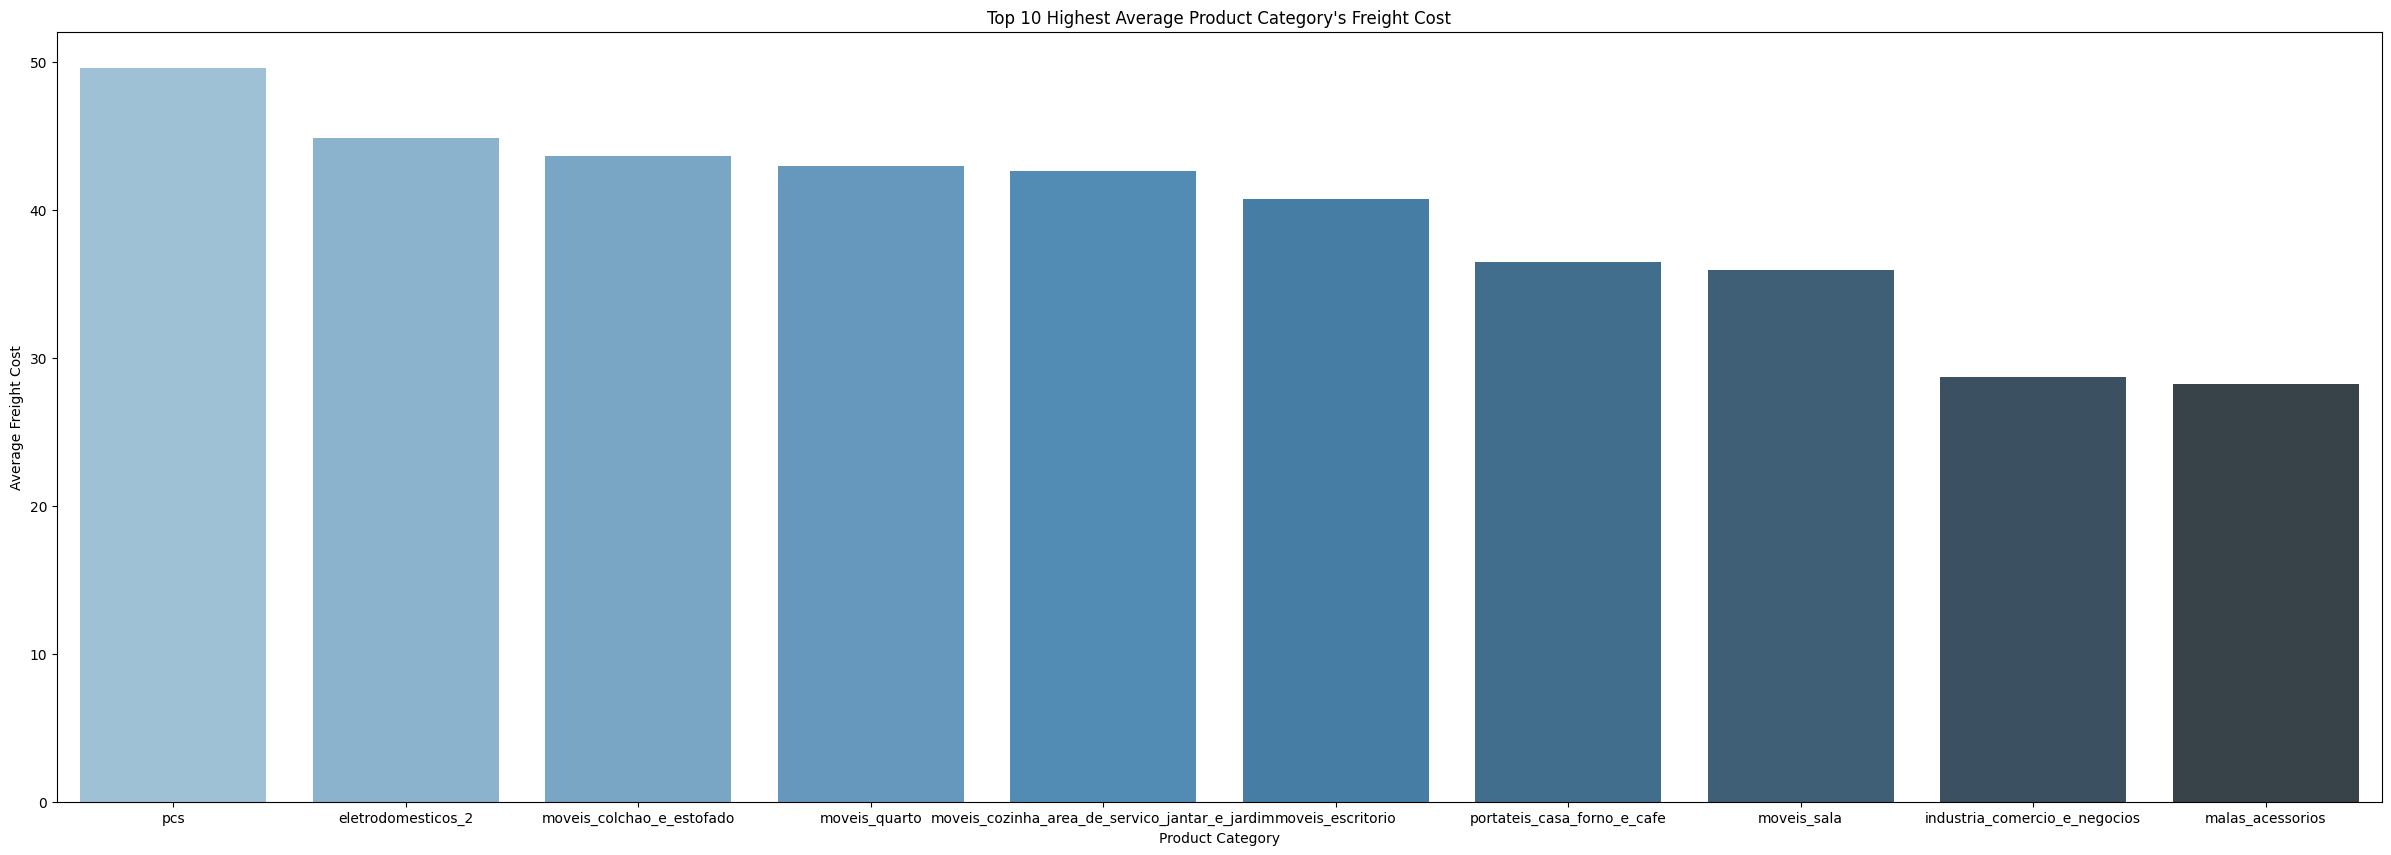

In [17]:
# Plot the graph
plt.figure(figsize=(30, 10))

sns.barplot(x='products_entity.product_category_name', y='products_entity.MEAN(orders_entity.freight_value)', 
            data=top_10_freight_cost, palette='Blues_d')
plt.xlabel('Product Category')
plt.ylabel('Average Freight Cost')
plt.title('Top 10 Highest Average Product Category\'s Freight Cost')
plt.show()

### Insights 7: The Number of Reviews Created After Order is Delivered

In [13]:
# Count the number of orders and reviews per year
orders_per_year = df['YEAR(order_delivered_customer_date)'].value_counts().sort_index()
reviews_per_year = df['reviews_entity.YEAR(review_answer_timestamp)'].value_counts().sort_index()

# Create a dataframe to display the results
result_df = pd.DataFrame({
    'Year': orders_per_year.index,
    'Orders Delivered': orders_per_year.values,
    'Reviews Answered': reviews_per_year.values
})

print(result_df)

   Year  Orders Delivered  Reviews Answered
0  2016               271               259
1  2017             40650             40294
2  2018             55071             55439


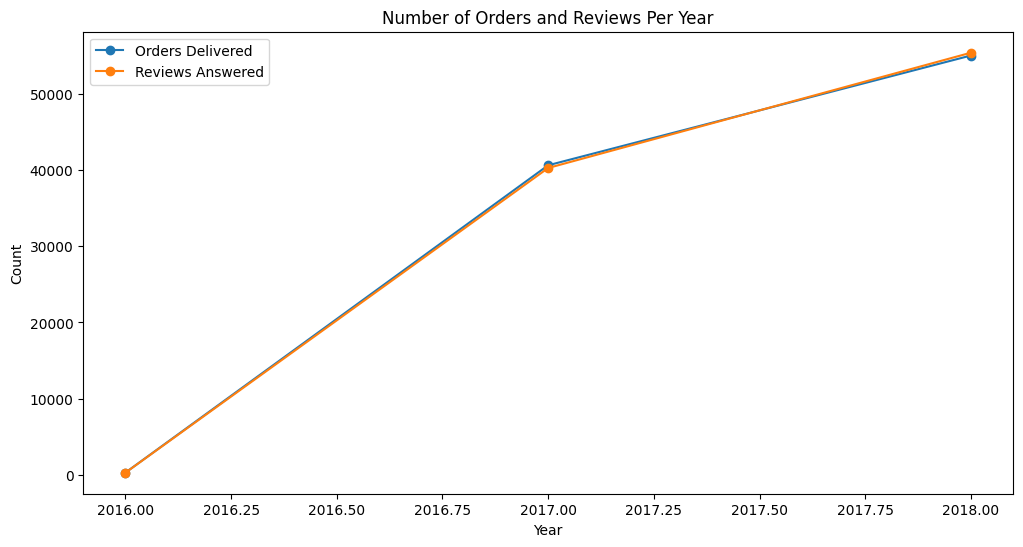

In [15]:
# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(result_df['Year'], result_df['Orders Delivered'], label='Orders Delivered', marker='o')
plt.plot(result_df['Year'], result_df['Reviews Answered'], label='Reviews Answered', marker='o')

plt.title('Number of Orders and Reviews Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

plt.show()